Importing Data

In [28]:
# installations pip3 install numpy pandas matplotlib scikit-learn seaborn
# import necessary libraries
import numpy as np                 # manipulating arrays
import scipy.stats                 # mathematical algorithms
import csv                         # opening csvs
import pandas as pd                # manipulating tabular data
import matplotlib.pyplot as plt    # regression plot
import math
import seaborn as sns              # for heatmap

In [29]:
Titanic_data_list = pd.read_csv("./data/train.csv")
print(Titanic_data_list.head())

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  


Heat Map General Understanding: 

The general idea of a heatmap is to provide a visual representation of data in the form of a matrix where colors indicate the magnitude of a metric or statistics. The purpose of producing such a plot is to verify that the features correlate to the endpoint without which the experiment would be pointless. 

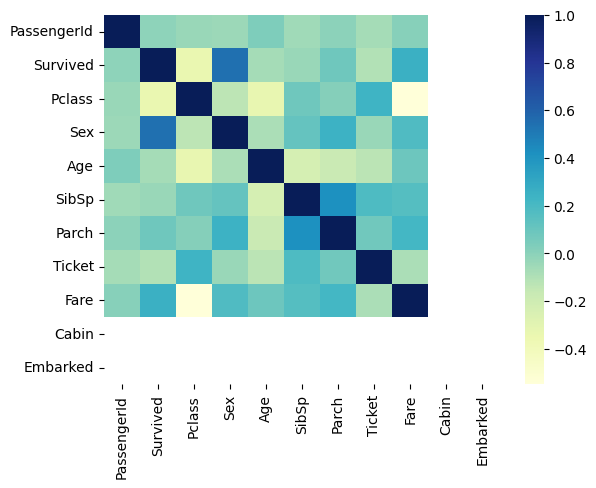

In [30]:

Titanic_data_lista = Titanic_data_list.drop(columns=['Name']) # Remove name
Titanic_data_lista = Titanic_data_lista.drop(columns=['Cabin']) # Remove cabin
Titanic_data_lista = Titanic_data_lista.drop(columns=['Embarked']) # Remove embarked
Titanic_data_lista['Sex'] = Titanic_data_lista['Sex'].map({'male': 0, 'female': 1}) #Convert sex to numrical value 0 for male and 1 for female
Titanic_data_lista = Titanic_data_lista.apply(pd.to_numeric, errors='coerce') # Make other features numeric
numeric_data = Titanic_data_lista.select_dtypes(include=[np.number]) # Must contain only numeric data
numeric_data_filled = numeric_data.fillna(numeric_data.mean()) # Fill missing values with the mean
corr = numeric_data_filled.corr() #Calculate the correlation the matrix


sns.heatmap(corr, cmap="YlGnBu")
plt.show()




Heat Map Specific: 
For our purposes, the focus is on the the 'Survived' feature with relation to all other features. From the observations we can varify that some of the features like 'sex' and 'fare' correlate positibely to the survival rate, and features like 'Pclass' negatively correlate to the rate. Therefore, there is deffinately a realationship to be explored and classified. The current version does not contain 'Cabin' and 'embarked' features due to them being strings. Hwoever, they will be added for the final report and are definitely features that influence the outcome. 

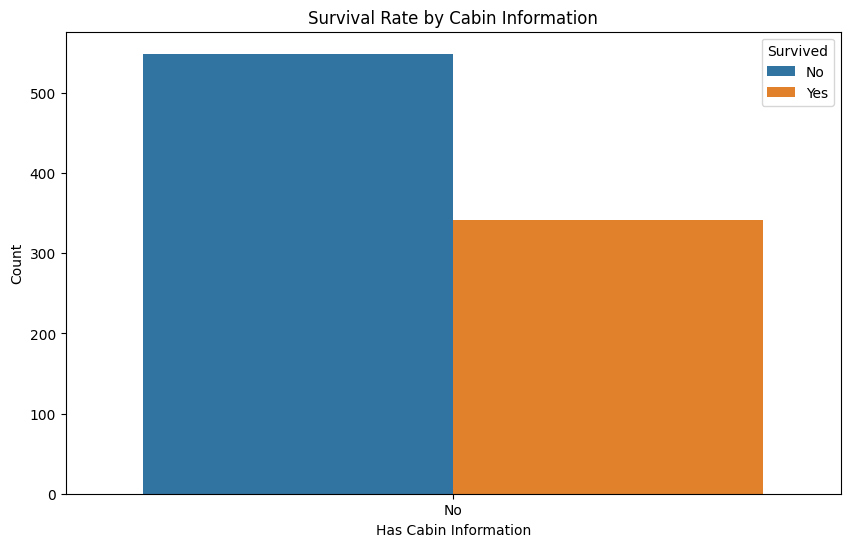

In [31]:
# Categorize passengers into those with and without cabin information
Titanic_data_list['Has_Cabin'] = Titanic_data_list['Cabin'].apply(lambda x: 'Yes' if pd.notnull(x) else 'No')

# Plot
plt.figure(figsize=(10, 6))
sns.countplot(x='Has_Cabin', hue='Survived', data=Titanic_data_list)

plt.title('Survival Rate by Cabin Information')
plt.xlabel('Has Cabin Information')
plt.ylabel('Count')
plt.legend(title='Survived', loc='upper right', labels=['No', 'Yes'])
plt.show()


the survival rates for passengers based on whether or not they had cabin information available.

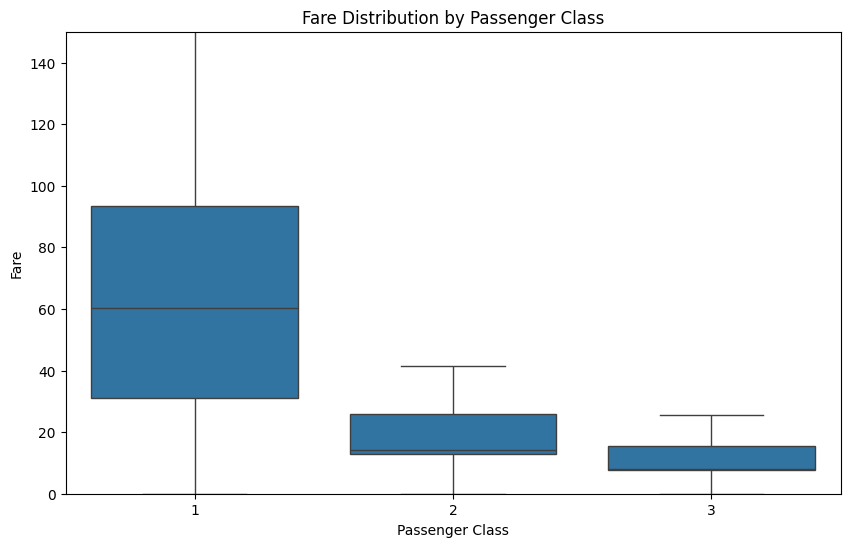

In [32]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Pclass', y='Fare', data=Titanic_data_list, showfliers=False)

plt.title('Fare Distribution by Passenger Class')
plt.xlabel('Passenger Class')
plt.ylabel('Fare')
plt.ylim(0, 150)  # Adjusting the y-axis limit to focus on the majority of data points
plt.show()


This box plot will show the distribution of fare prices within each passenger class, excluding outliers to focus on the core distribution. It can reveal the economic disparities between classes and how they correlate with the fare structure on the Titanic.

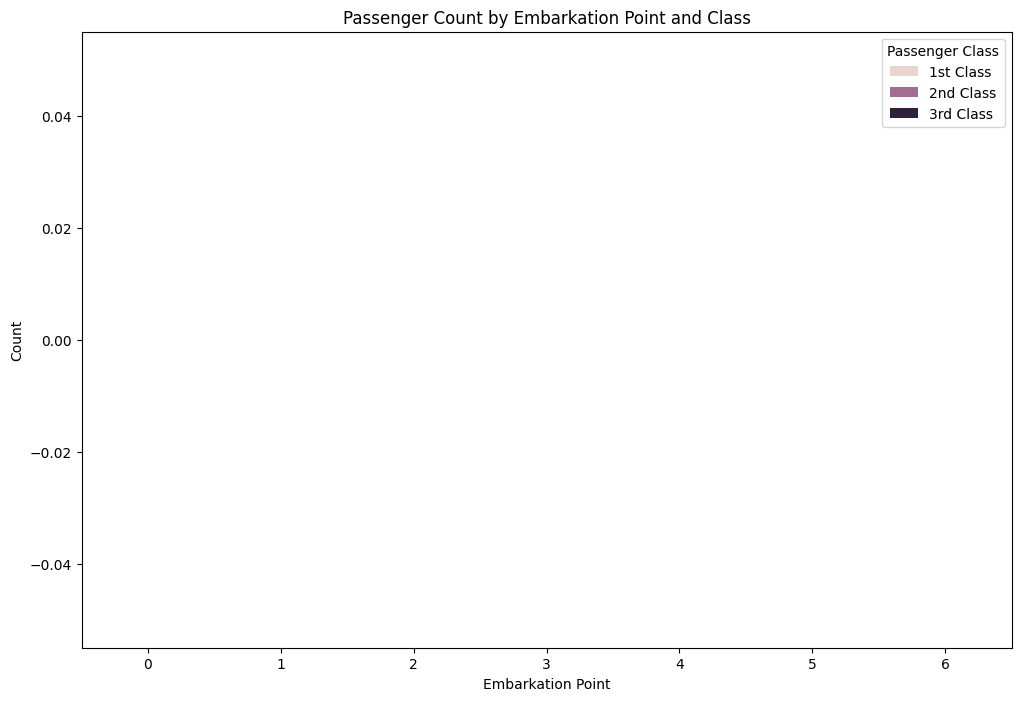

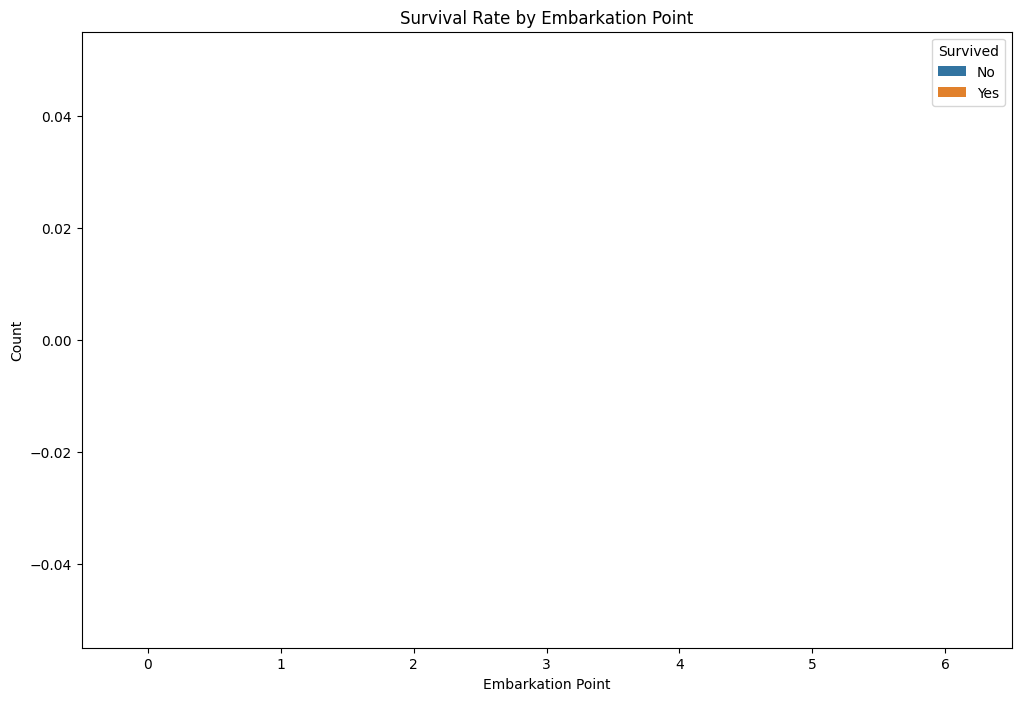

In [33]:
plt.figure(figsize=(12, 8))
sns.countplot(x='Embarked', hue='Pclass', data=Titanic_data_list)

plt.title('Passenger Count by Embarkation Point and Class')
plt.xlabel('Embarkation Point')
plt.ylabel('Count')
plt.legend(title='Passenger Class', loc='upper right', labels=['1st Class', '2nd Class', '3rd Class'])
plt.show()

plt.figure(figsize=(12, 8))
sns.countplot(x='Embarked', hue='Survived', data=Titanic_data_list)

plt.title('Survival Rate by Embarkation Point')
plt.xlabel('Embarkation Point')
plt.ylabel('Count')
plt.legend(title='Survived', loc='upper right', labels=['No', 'Yes'])
plt.show()


the relationship between the embarkation point, class, and survival. This plot will give us insights into any patterns that might exist between where passengers embarked, their class, and their survival outcomes.

/var/folders/k9/zgv5m3mj01v8fbwsz8w2tcdc0000gn/T/ipykernel_95374/114277437.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Titanic_data_age_filtered['Age_Z_Score'] = zscore(Titanic_data_age_filtered['Age'])


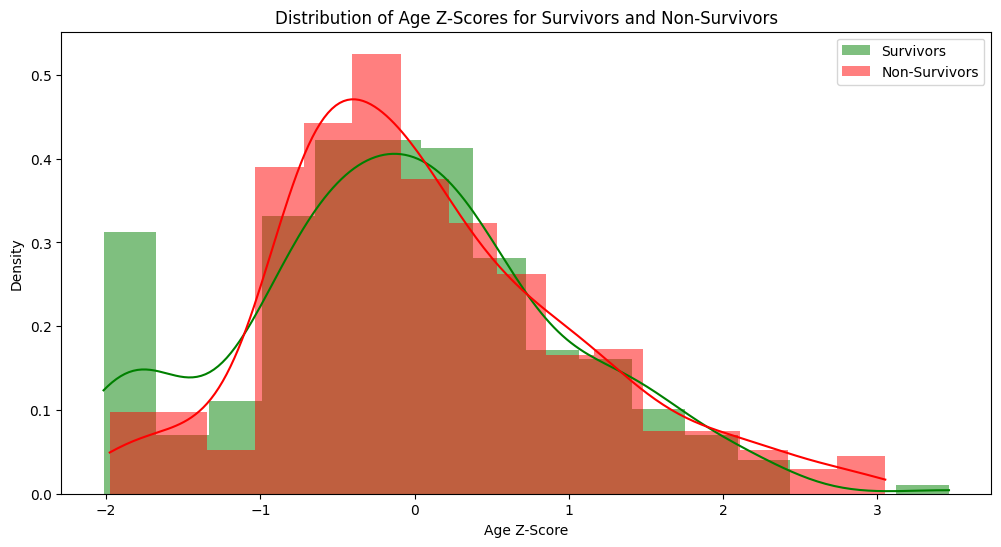

In [34]:
from scipy.stats import zscore

# Filter out passengers with missing age
Titanic_data_age_filtered = Titanic_data_list.dropna(subset=['Age'])

# Calculate z-scores for ages
Titanic_data_age_filtered['Age_Z_Score'] = zscore(Titanic_data_age_filtered['Age'])

# Separate survivors and non-survivors
survivors = Titanic_data_age_filtered[Titanic_data_age_filtered['Survived'] == 1]
non_survivors = Titanic_data_age_filtered[Titanic_data_age_filtered['Survived'] == 0]

# Plot histograms
plt.figure(figsize=(12, 6))

sns.histplot(survivors['Age_Z_Score'], color="green", kde=True, label='Survivors', stat="density", linewidth=0)
sns.histplot(non_survivors['Age_Z_Score'], color="red", kde=True, label='Non-Survivors', stat="density", linewidth=0)

plt.title('Distribution of Age Z-Scores for Survivors and Non-Survivors')
plt.xlabel('Age Z-Score')
plt.ylabel('Density')
plt.legend()
plt.show()


To delve deeper into survival analysis and introduce a statistical perspective, let's consider a z-score plot for the age of passengers. Z-scores measure the distance of a data point from the mean in terms of standard deviations. This can be particularly useful for understanding how the age of survivors and non-survivors compares to the overall passenger age distribution.

We'll calculate the z-scores for the ages of passengers and then create two histograms: one for survivors and another for non-survivors, to see how their ages deviate from the mean passenger age. This analysis will be based on passengers with recorded ages, omitting missing values.